# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib

# Loading the raw Airbnb LA data

## listings_df

In [3]:
listings_df = pd.read_csv("../data/raw/listings.csv.gz", compression="gzip")

In [4]:
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,city scrape,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Run Runyon Canyon<br /><br />Gym & Sauna <br /...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/hosting/Hosti...,3008,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33
1,2732,https://www.airbnb.com/rooms/2732,20250901181307,2025-09-03,city scrape,Zen Life at the Beach,An oasis of tranquility awaits you.,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082993/c5a99...,3041,...,4.48,4.91,4.22,228269,f,2,1,1,0,0.14


### Check how many rows and columns in the dataframe

In [5]:
listings_df.shape

(45886, 79)

### Display all the available column names in the dataframe

In [6]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45886 entries, 0 to 45885
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            45886 non-null  int64  
 1   listing_url                                   45886 non-null  object 
 2   scrape_id                                     45886 non-null  int64  
 3   last_scraped                                  45886 non-null  object 
 4   source                                        45886 non-null  object 
 5   name                                          45885 non-null  object 
 6   description                                   44917 non-null  object 
 7   neighborhood_overview                         19936 non-null  object 
 8   picture_url                                   45886 non-null  object 
 9   host_id                                       45886 non-null 

## reviews_df

In [8]:
reviews_df = pd.read_csv("../data/raw/reviews.csv.gz", compression="gzip")

In [9]:
reviews_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
1,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
2,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...
3,2708,61157407,2016-02-01,33226412,Haroon,Charles is a most wonderful host. I enjoyed my...
4,2708,66196280,2016-03-20,23408691,Massimo Litterio,Chas is a really good host. He gives me a lot ...


### Check how many rows and columns in the dataframe

In [10]:
reviews_df.shape

(1747347, 6)

### Display all the available column names in the dataframe

In [11]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [12]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747347 entries, 0 to 1747346
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 80.0+ MB


# Merge Listings and Reviews

## Merge reviews with listings on listing_id

In [13]:
la_reviews = reviews_df.merge(
    listings_df,
    left_on='listing_id',
    right_on='id',
    how='left',
    suffixes=('_review', '_listing')
)


In [14]:
print("Shape after merge:", la_reviews.shape)
display(la_reviews.head(3))

Shape after merge: (1747347, 85)


,listing_id,id_review,date,reviewer_id,reviewer_name,comments,id_listing,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33
1,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33
2,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33


## Compute total number of reviews per listing_id

In [15]:
la_reviews['listing_total_reviews'] = la_reviews.groupby('listing_id')['listing_id'].transform('count')

In [16]:
display(la_reviews[['listing_id','listing_total_reviews']].head(5))

,listing_id,listing_total_reviews
0,2708,45
1,2708,45
2,2708,45
3,2708,45
4,2708,45


# Select relevant columns 

In [18]:
la_reviews_clean = la_reviews[[
    'listing_id', 'id_review', 'date', 'reviewer_id', 'comments',
    'name', 'property_type', 'room_type', 'neighbourhood_cleansed',
    'latitude', 'longitude', 'host_id', 'host_total_listings_count',
    'host_name', 'number_of_reviews', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'accommodates', 'bedrooms', 'beds', 'price', 'listing_total_reviews'
]].copy()

## Add city + establishment type

In [19]:
la_reviews_clean['city'] = 'Los Angeles'
la_reviews_clean['establishment_type'] = 'Airbnb Accommodation'

In [20]:
la_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747347 entries, 0 to 1747346
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   listing_id                   int64  
 1   id_review                    int64  
 2   date                         object 
 3   reviewer_id                  int64  
 4   comments                     object 
 5   name                         object 
 6   property_type                object 
 7   room_type                    object 
 8   neighbourhood_cleansed       object 
 9   latitude                     float64
 10  longitude                    float64
 11  host_id                      int64  
 12  host_total_listings_count    float64
 13  host_name                    object 
 14  number_of_reviews            int64  
 15  review_scores_rating         float64
 16  review_scores_accuracy       float64
 17  review_scores_cleanliness    float64
 18  review_scores_checkin        float64
 19  

# Annual analysis and period selection

## Convert review date to datetime

In [21]:
la_reviews_clean['date'] = pd.to_datetime(
    la_reviews_clean['date'], errors='coerce'
)

In [22]:
print(la_reviews_clean['date'].dtype)

datetime64[ns]


In [23]:
# Airbnb does not provide the stay date, so we use the review date instead

la_reviews_clean['visit_date'] = la_reviews_clean['date']

## Extract year

In [24]:
la_reviews_clean['year'] = la_reviews_clean['date'].dt.year

## Count reviews per year

In [25]:
reviews_per_year = la_reviews_clean['year'].value_counts().sort_index()

In [26]:
print(reviews_per_year)

year
2009        24
2010       197
2011       857
2012      2147
2013      5179
2014     12727
2015     26784
2016     50772
2017     80267
2018    120006
2019    163212
2020     99500
2021    145781
2022    205464
2023    262568
2024    323431
2025    248431
Name: count, dtype: int64


## Visualisation

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Filter years 2014-2025
df = la_reviews_clean[(la_reviews_clean['year'] >= 2014) & (la_reviews_clean['year'] <= 2025)].copy()

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create season column
def get_season(date):
    if pd.isna(date):
        return None
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].apply(get_season)
df['combined'] = 'Combined'

# Optional: sample 50k rows to avoid memory issues
df_sample = df.sample(n=50000, random_state=42)

Function for plotting graphs

In [29]:
def plot_season_timeline(data, property_type_col='property_type', date_col='date'):
    types = data[property_type_col].dropna().unique().tolist()
    types = types[:2] 
    types.append('Combined')
    
    fig, axes = plt.subplots(nrows=len(types), ncols=2, figsize=(14, 5*len(types)))
    
    if len(types) == 1:
        axes = [axes]  # for one type
    
    for i, t in enumerate(types):
        ax_bar, ax_line = axes[i, 0], axes[i, 1]
        
        # Filter by type
        if t == 'Combined':
            subset = data.copy()
        else:
            subset = data[data[property_type_col] == t]
        
        # Seasonal distribution
        season_counts = subset['season'].value_counts().reindex(['Winter','Spring','Summer','Fall']).fillna(0)
        season_percent = season_counts / season_counts.sum() * 100
        
        # Bar chart
        ax_bar.bar(season_counts.index, season_counts.values, color=['lightblue','steelblue','indianred','orange'])
        for j, v in enumerate(season_counts.values):
            ax_bar.text(j, v + max(season_counts.values)*0.01, f"{v}\n({season_percent.iloc[j]:.1f}%)",
                        ha='center', fontweight='bold')
        ax_bar.set_title(f'{t} - Seasonal Distribution')
        ax_bar.set_ylabel('Number of Reviews')
        
       # Line chart by month
        monthly_counts = subset.groupby(pd.Grouper(key=date_col, freq='ME')).size()
        ax_line.plot(monthly_counts.index, monthly_counts.values, color='steelblue')
        ax_line.fill_between(monthly_counts.index, monthly_counts.values, color='steelblue', alpha=0.2)
        ax_line.set_title(f'{t} - Timeline')
        ax_line.set_ylabel('Reviews per Month')
    
    plt.suptitle('Seasonal Review Distribution and Timeline (2014-2025)', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

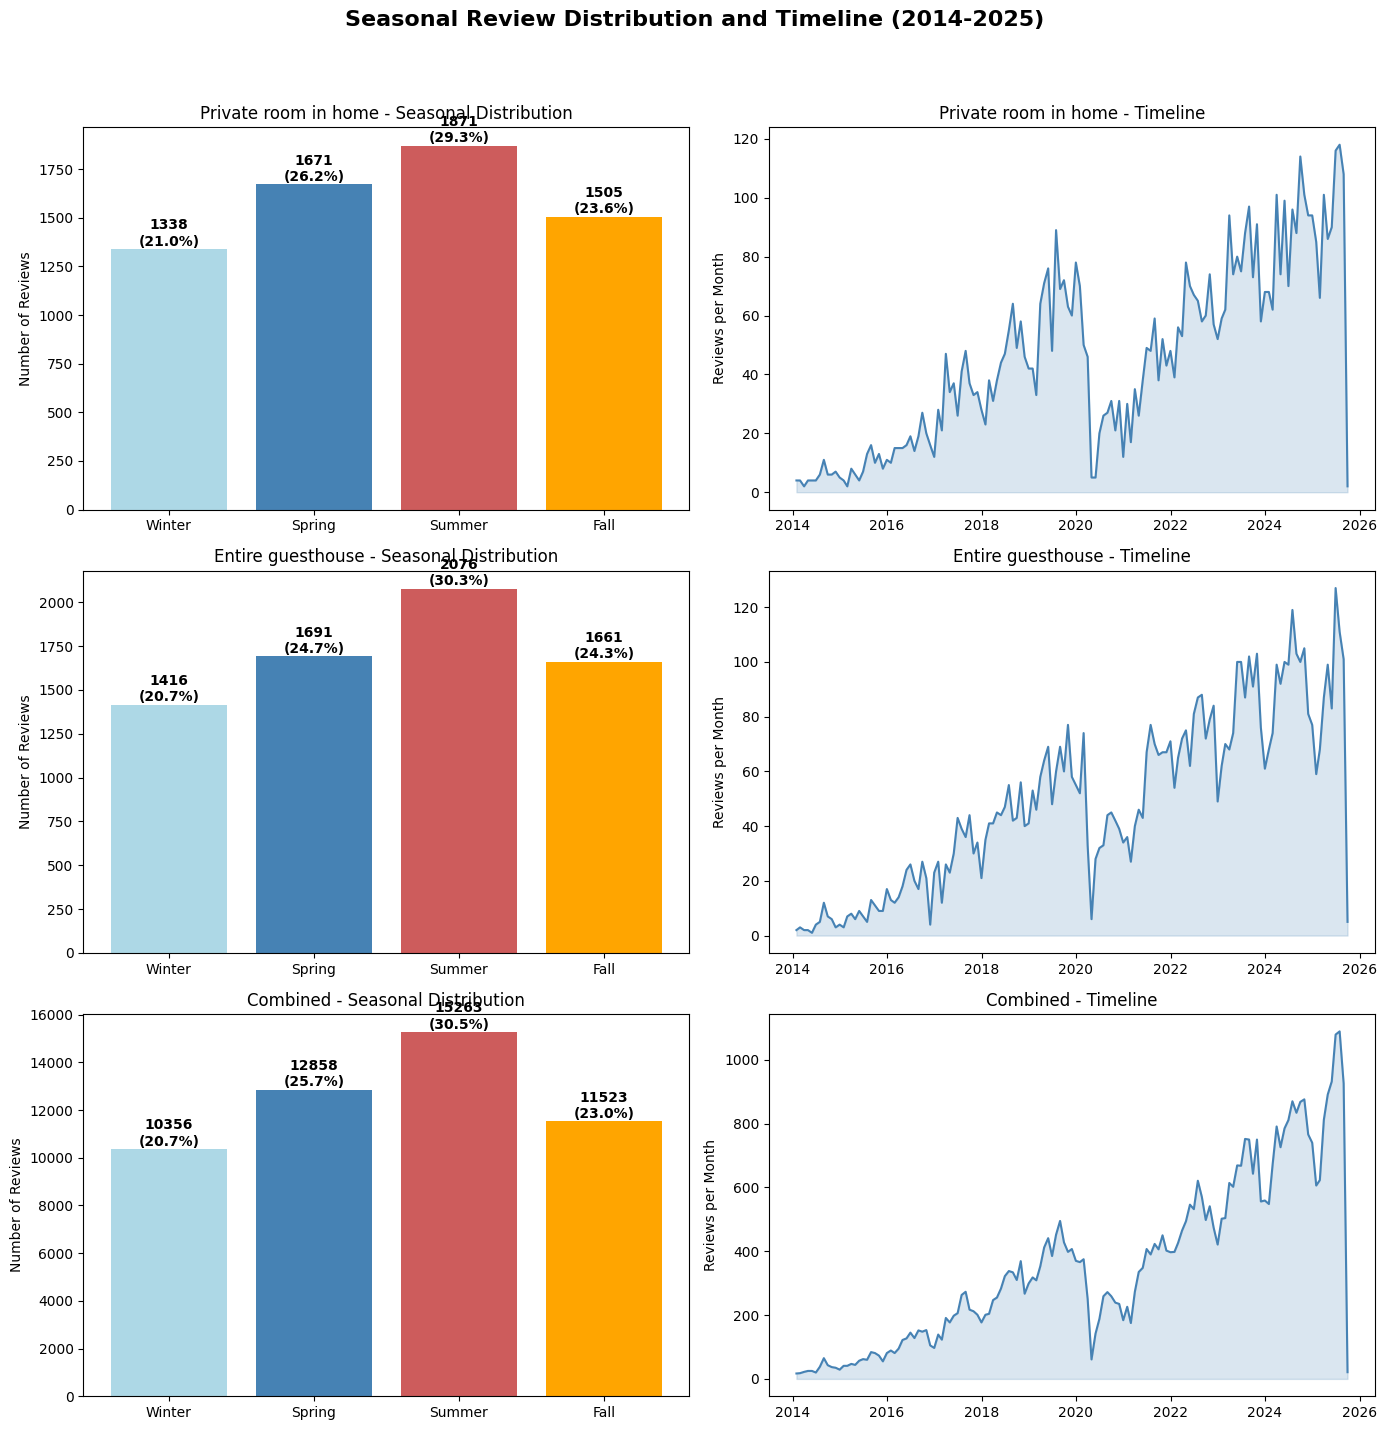

In [30]:
plot_season_timeline(df_sample)

# Filtering by year and language (English reviews)

## FILTERING ENGLISH REVIEWS

In [31]:
import fasttext
import pandas as pd
from tqdm import tqdm

FastText model

In [32]:
model = fasttext.load_model("lid.176.ftz")

Language detection function

In [33]:
def detect_language(text):
    if not isinstance(text, str) or not text.strip():
        return None
    label = model.predict(text.replace("\n", " "))[0][0]
    return label.replace("__label__", "")


The date is in datetime format

In [34]:
la_reviews_clean['date'] = pd.to_datetime(la_reviews_clean['date'])

Keep the original df to filter by years

In [35]:
la_reviews_clean_orig = la_reviews_clean.copy()

## FILTER YEAR 2024

In [36]:
year_to_filter = 2024
reviews_2024 = la_reviews_clean_orig.loc[
    la_reviews_clean_orig['date'].dt.year == year_to_filter
].copy()
print(f"Number of reviews in {year_to_filter}: {len(reviews_2024)}")

Number of reviews in 2024: 323431


Determine the language by batches

In [37]:
batch_size = 50000
languages = []

for i in tqdm(range(0, len(reviews_2024), batch_size), desc="Detecting language 2024"):
    batch = reviews_2024.iloc[i:i+batch_size]
    batch_langs = batch["comments"].apply(detect_language).tolist()
    languages.extend(batch_langs)

reviews_2024["language"] = languages

Detecting language 2024: 100%|█████████████████████████████████████████████████████████████████████████| 7/7 [00:23<00:00,  3.29s/it]


Leave only English reviews

In [38]:
reviews_2024 = reviews_2024.loc[reviews_2024["language"] == "en"].copy()
print(f"Number of English reviews in {year_to_filter}: {len(reviews_2024)}")

Number of English reviews in 2024: 295701


In [39]:
la_reviews_2024 = reviews_2024
la_reviews_2024['city'] = 'Los Angeles'
la_reviews_2024.head(2)

,listing_id,id_review,date,reviewer_id,comments,name,property_type,room_type,neighbourhood_cleansed,latitude,...,accommodates,bedrooms,beds,price,listing_total_reviews,city,establishment_type,visit_date,year,language
40,2708,1107399330909692945,2024-03-07,201664381,Great starting point for anyone's LA adventure...,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Private room in rental unit,Private room,Hollywood,34.09625,...,1,1.0,1.0,$81.00,45,Los Angeles,Airbnb Accommodation,2024-03-07,2024,en
41,2708,1175511762719203533,2024-06-09,226451147,Very pleasant stay,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Private room in rental unit,Private room,Hollywood,34.09625,...,1,1.0,1.0,$81.00,45,Los Angeles,Airbnb Accommodation,2024-06-09,2024,en


## Filter Year 2022

In [40]:
year_to_filter = 2022
reviews_2022 = la_reviews_clean_orig.loc[
    la_reviews_clean_orig['date'].dt.year == year_to_filter
].copy()
print(f"Number of reviews in {year_to_filter}: {len(reviews_2022)}")

Number of reviews in 2022: 205464


In [41]:
languages = []

for i in tqdm(range(0, len(reviews_2022), batch_size), desc="Detecting language 2022"):
    batch = reviews_2022.iloc[i:i+batch_size]
    batch_langs = batch["comments"].apply(detect_language).tolist()
    languages.extend(batch_langs)

reviews_2022["language"] = languages

Detecting language 2022: 100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.03s/it]


In [42]:
la_reviews_2022 = reviews_2022.loc[reviews_2022["language"] == "en"].copy()
la_reviews_2022['city'] = 'Los Angeles' 
print(f"Number of English reviews in {year_to_filter}: {len(la_reviews_2022)}")

Number of English reviews in 2022: 196964


In [43]:
la_reviews_2022.head(3)

,listing_id,id_review,date,reviewer_id,comments,name,property_type,room_type,neighbourhood_cleansed,latitude,...,accommodates,bedrooms,beds,price,listing_total_reviews,city,establishment_type,visit_date,year,language
34,2708,539875599340984068,2022-01-14,389135981,Good location the hosts and room mate is reall...,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Private room in rental unit,Private room,Hollywood,34.09625,...,1,1.0,1.0,$81.00,45,Los Angeles,Airbnb Accommodation,2022-01-14,2022,en
35,2708,563107741849741014,2022-02-15,27944842,Great host,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Private room in rental unit,Private room,Hollywood,34.09625,...,1,1.0,1.0,$81.00,45,Los Angeles,Airbnb Accommodation,2022-02-15,2022,en
36,2708,586244725063977055,2022-03-19,33880315,I really enjoyed staying here. The descriptio...,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Private room in rental unit,Private room,Hollywood,34.09625,...,1,1.0,1.0,$81.00,45,Los Angeles,Airbnb Accommodation,2022-03-19,2022,en


In [45]:
import pyarrow as pa
import pyarrow.parquet as pq
import os

def save_parquet_in_chunks(df, output_file, chunksize=100_000):
    """Save a DataFrame to Parquet in chunks to avoid memory issues."""
    # If file exists, remove it
    if os.path.exists(output_file):
        os.remove(output_file)
    
    writer = None
    for i in range(0, len(df), chunksize):
        chunk = df.iloc[i:i+chunksize]
        table = pa.Table.from_pandas(chunk)
        
        if writer is None:
            writer = pq.ParquetWriter(output_file, table.schema)
        
        writer.write_table(table)
    
    if writer:
        writer.close()
    print(f"✅ {output_file} successfully saved in chunks")

### SAVE THE OUTPUT FILES

In [46]:
save_parquet_in_chunks(la_reviews_2022, "../data/processed/la_reviews_2022.parquet")
save_parquet_in_chunks(la_reviews_2024, "../data/processed/la_reviews_2024.parquet")

✅ ../data/processed/la_reviews_2022.parquet successfully saved in chunks
✅ ../data/processed/la_reviews_2024.parquet successfully saved in chunks


# Load saved Parquet files

In [17]:
import pandas as pd

la_reviews_2022 = pd.read_parquet("../data/processed/la_reviews_2022.parquet")
la_reviews_2024 = pd.read_parquet("../data/processed/la_reviews_2024.parquet")

print(la_reviews_2022.shape, la_reviews_2024.shape)
la_reviews_2022.head(2)

(196964, 32) (295701, 32)


,listing_id,id_review,date,reviewer_id,comments,name,property_type,room_type,neighbourhood_cleansed,latitude,...,accommodates,bedrooms,beds,price,listing_total_reviews,city,establishment_type,visit_date,year,language
34,2708,539875599340984068,2022-01-14,389135981,Good location the hosts and room mate is reall...,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Private room in rental unit,Private room,Hollywood,34.09625,...,1,1.0,1.0,$81.00,45,Los Angeles,Airbnb Accommodation,2022-01-14,2022,en
35,2708,563107741849741014,2022-02-15,27944842,Great host,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Private room in rental unit,Private room,Hollywood,34.09625,...,1,1.0,1.0,$81.00,45,Los Angeles,Airbnb Accommodation,2022-02-15,2022,en


# Adding seasons (winter/spring/summer/fall)

Function for determining the season by month

In [18]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

## For 2024

In [19]:
la_reviews_2024['month'] = la_reviews_2024['date'].dt.month
la_reviews_2024['season'] = la_reviews_2024['month'].apply(month_to_season)

print("Seasonal distribution for 2024:")
print(la_reviews_2024['season'].value_counts())

Seasonal distribution for 2024:
season
Summer    82678
Fall      77473
Spring    74195
Winter    61355
Name: count, dtype: int64


## For 2022

In [20]:
la_reviews_2022['month'] = la_reviews_2022['date'].dt.month
la_reviews_2022['season'] = la_reviews_2022['month'].apply(month_to_season)

print("\nSeasonal distribution for 2022:")
print(la_reviews_2022['season'].value_counts())


Seasonal distribution for 2022:
season
Summer    54031
Fall      51476
Spring    51006
Winter    40451
Name: count, dtype: int64


### Seasonal distribution visualisation

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
la_reviews_2022['year'] = 2022
la_reviews_2024['year'] = 2024

combined = pd.concat([la_reviews_2022, la_reviews_2024])

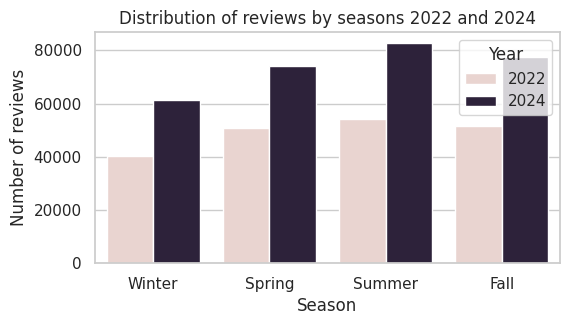

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,3))
sns.countplot(data=combined, x='season', hue='year', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title("Distribution of reviews by seasons 2022 and 2024")
plt.ylabel("Number of reviews")
plt.xlabel("Season")
plt.legend(title="Year")
plt.show()

# Calculating the total number of reviews per user (reviewer_total_reviews) 

## 2022 Year

In [24]:
reviewer_counts_2022 = la_reviews_2022.groupby('reviewer_id')['id_review'].count().reset_index()
reviewer_counts_2022.rename(columns={'id_review': 'reviewer_total_reviews'}, inplace=True)

la_reviews_2022 = la_reviews_2022.merge(reviewer_counts_2022, on='reviewer_id', how='left')

## 2024 Year

In [25]:
reviewer_counts_2024 = la_reviews_2024.groupby('reviewer_id')['id_review'].count().reset_index()
reviewer_counts_2024.rename(columns={'id_review': 'reviewer_total_reviews'}, inplace=True)

la_reviews_2024 = la_reviews_2024.merge(reviewer_counts_2024, on='reviewer_id', how='left')

In [26]:
print("Example 2022:")
display(la_reviews_2022[['reviewer_id', 'reviewer_total_reviews']].head())

Example 2022:


,reviewer_id,reviewer_total_reviews
0,389135981,1
1,27944842,1
2,33880315,1
3,51893738,1
4,138013883,2


In [27]:
print("Example 2024:")
display(la_reviews_2024[['reviewer_id', 'reviewer_total_reviews']].head())

Example 2024:


,reviewer_id,reviewer_total_reviews
0,201664381,1
1,226451147,1
2,68037230,3
3,5489381,1
4,93236650,1


### Visualisation

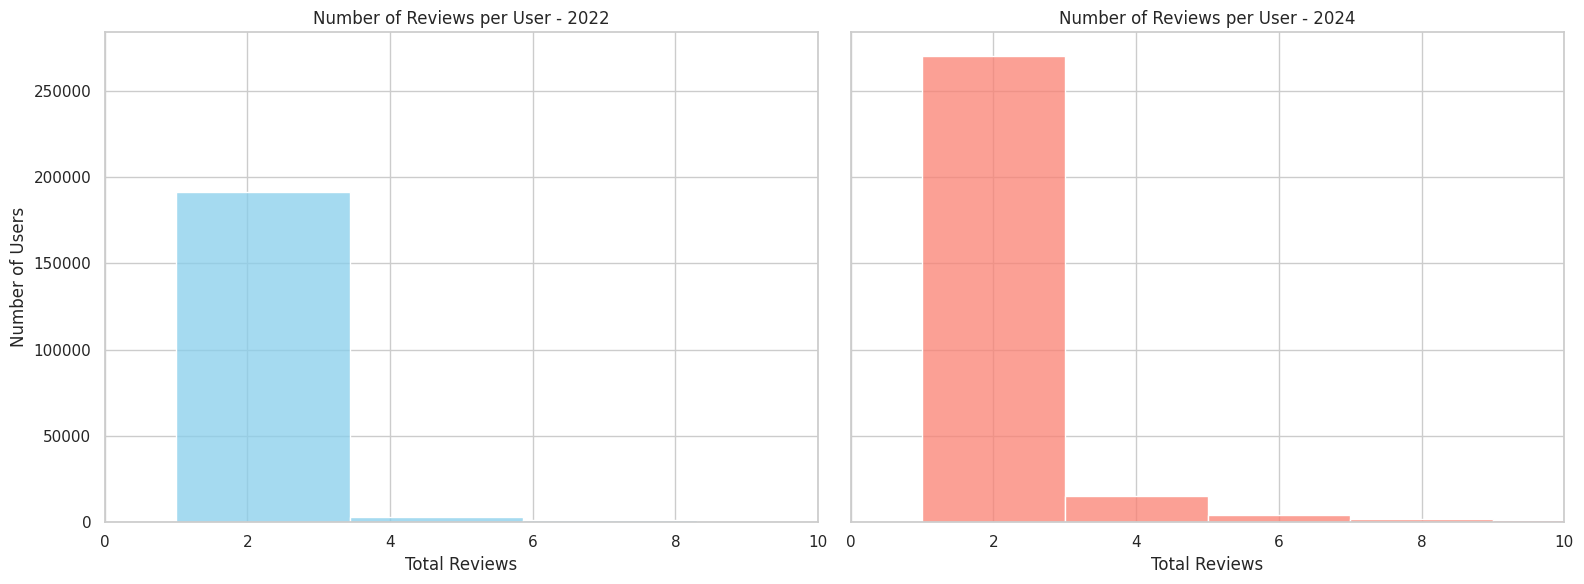

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 2022
sns.histplot(la_reviews_2022['reviewer_total_reviews'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Number of Reviews per User - 2022')
axes[0].set_xlabel('Total Reviews')
axes[0].set_ylabel('Number of Users')
axes[0].set_xlim(0, 10)
# 2024
sns.histplot(la_reviews_2024['reviewer_total_reviews'], bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Number of Reviews per User - 2024')
axes[1].set_xlabel('Total Reviews')
axes[1].set_ylabel('')
axes[1].set_xlim(0, 10)

plt.tight_layout()
plt.show()

# Business status (business_status)

Create last_reviews based on combined data

In [29]:
combined = pd.concat([la_reviews_2022[['listing_id','date']], 
                      la_reviews_2024[['listing_id','date']]], ignore_index=True)

last_reviews = combined.groupby('listing_id')['date'].max().reset_index()
last_reviews.rename(columns={'date': 'last_review'}, inplace=True)

Merge with each year

In [30]:
la_reviews_2022 = la_reviews_2022.merge(last_reviews, on='listing_id', how='left')
la_reviews_2024 = la_reviews_2024.merge(last_reviews, on='listing_id', how='left')

Vectorized Business status

In [31]:
la_reviews_2022['last_review'] = pd.to_datetime(la_reviews_2022['last_review'])
la_reviews_2022['business_status'] = np.where(
    la_reviews_2022['last_review'].isna(), 'No Reviews',
    np.where(la_reviews_2022['last_review'] < pd.Timestamp('2022-01-01'), 'Shuttered', 'Active')
)

la_reviews_2024['last_review'] = pd.to_datetime(la_reviews_2024['last_review'])
la_reviews_2024['business_status'] = np.where(
    la_reviews_2024['last_review'].isna(), 'No Reviews',
    np.where(la_reviews_2024['last_review'] < pd.Timestamp('2022-01-01'), 'Shuttered', 'Active')
)

Count listings by business status

In [32]:
status_2022 = la_reviews_2022['business_status'].value_counts().reset_index()
status_2022.columns = ['business_status', 'count'] 
status_2022['year'] = 2022

status_2024 = la_reviews_2024['business_status'].value_counts().reset_index()
status_2024.columns = ['business_status', 'count']
status_2024['year'] = 2024

Combine 2022 and 2024 status data

In [33]:
status_all_correct = pd.concat([status_2022, status_2024], ignore_index=True)

In [34]:
print(status_all_correct.columns)
print(status_all_correct.head())

Index(['business_status', 'count', 'year'], dtype='object')
  business_status   count  year
0          Active  196964  2022
1          Active  295701  2024


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualisation

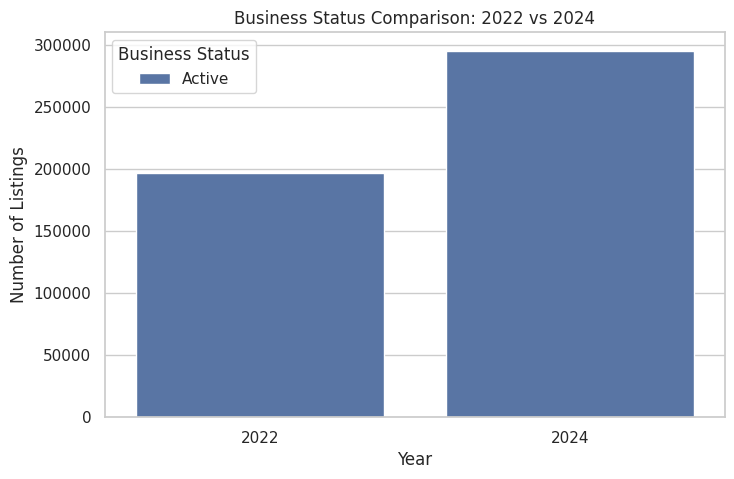

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=status_all_correct, x='year', y='count', hue='business_status')
plt.title('Business Status Comparison: 2022 vs 2024')
plt.ylabel('Number of Listings')
plt.xlabel('Year')
plt.legend(title='Business Status')
plt.show()

Add operational status for 2024 (Will still be working in 2024)

In [36]:
la_reviews_2022['operational_2024'] = np.where(
    la_reviews_2022['last_review'] >= pd.Timestamp("2024-01-01"),
    'Still operating in 2024',
    'No evidence of activity in 2024'
)

la_reviews_2024['operational_2024'] = 'Still operating in 2024'

Save back to Parquet

In [37]:
la_reviews_2022.to_parquet("../data/processed/la_reviews_2022.parquet", index=False)
la_reviews_2024.to_parquet("../data/processed/la_reviews_2024.parquet", index=False)

# Identifying significant features for analysis

Compute numeric and amenity features

In [39]:
for df in [la_reviews_2022, la_reviews_2024]:
    # Convert price to numeric
    df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Count amenities if column exists
    if 'amenities' in df.columns:
        df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
    else:
        df['amenities_count'] = 0  # fallback if column missing

Define salient features

In [40]:
salient_features = ['accommodates', 'bedrooms', 'beds', 'property_type', 'amenities_count', 'price_num']

Summarize numeric features

In [41]:
sample_size = 50000 
summary_2022 = la_reviews_2022[salient_features].sample(sample_size, random_state=42).describe().T
summary_2024 = la_reviews_2024[salient_features].sample(sample_size, random_state=42).describe().T

Add year column

In [42]:
summary_2022['year'] = 2022
summary_2024['year'] = 2024


Combine summaries

In [43]:
summary_all = pd.concat([summary_2022, summary_2024])
display(summary_all)

,count,mean,std,min,25%,50%,75%,max,year
accommodates,50000.0,3.885880,2.581966,1.0,2.0,3.0,5.0,16.0,2022
bedrooms,48648.0,1.530998,1.167013,0.0,1.0,1.0,2.0,23.0,2022
beds,45445.0,2.167631,1.580895,0.0,1.0,2.0,3.0,25.0,2022
amenities_count,50000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2022
price_num,45449.0,199.112082,241.664884,23.0,99.0,142.0,218.0,19950.0,2022
accommodates,50000.0,4.305540,2.810940,1.0,2.0,4.0,6.0,16.0,2024
bedrooms,49097.0,1.699208,1.201354,0.0,1.0,1.0,2.0,13.0,2024
beds,46900.0,2.323454,1.661183,0.0,1.0,2.0,3.0,25.0,2024
amenities_count,50000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2024
price_num,46840.0,225.379441,914.504707,14.0,107.0,155.0,234.0,50000.0,2024


Visualize numeric features

In [44]:
numeric_features = ['accommodates', 'bedrooms', 'beds', 'price_num']

Combine data for plotting

In [45]:
la_reviews_2022['year'] = 2022
la_reviews_2024['year'] = 2024
df_combined = pd.concat([la_reviews_2022, la_reviews_2024], ignore_index=True)

Boxplots

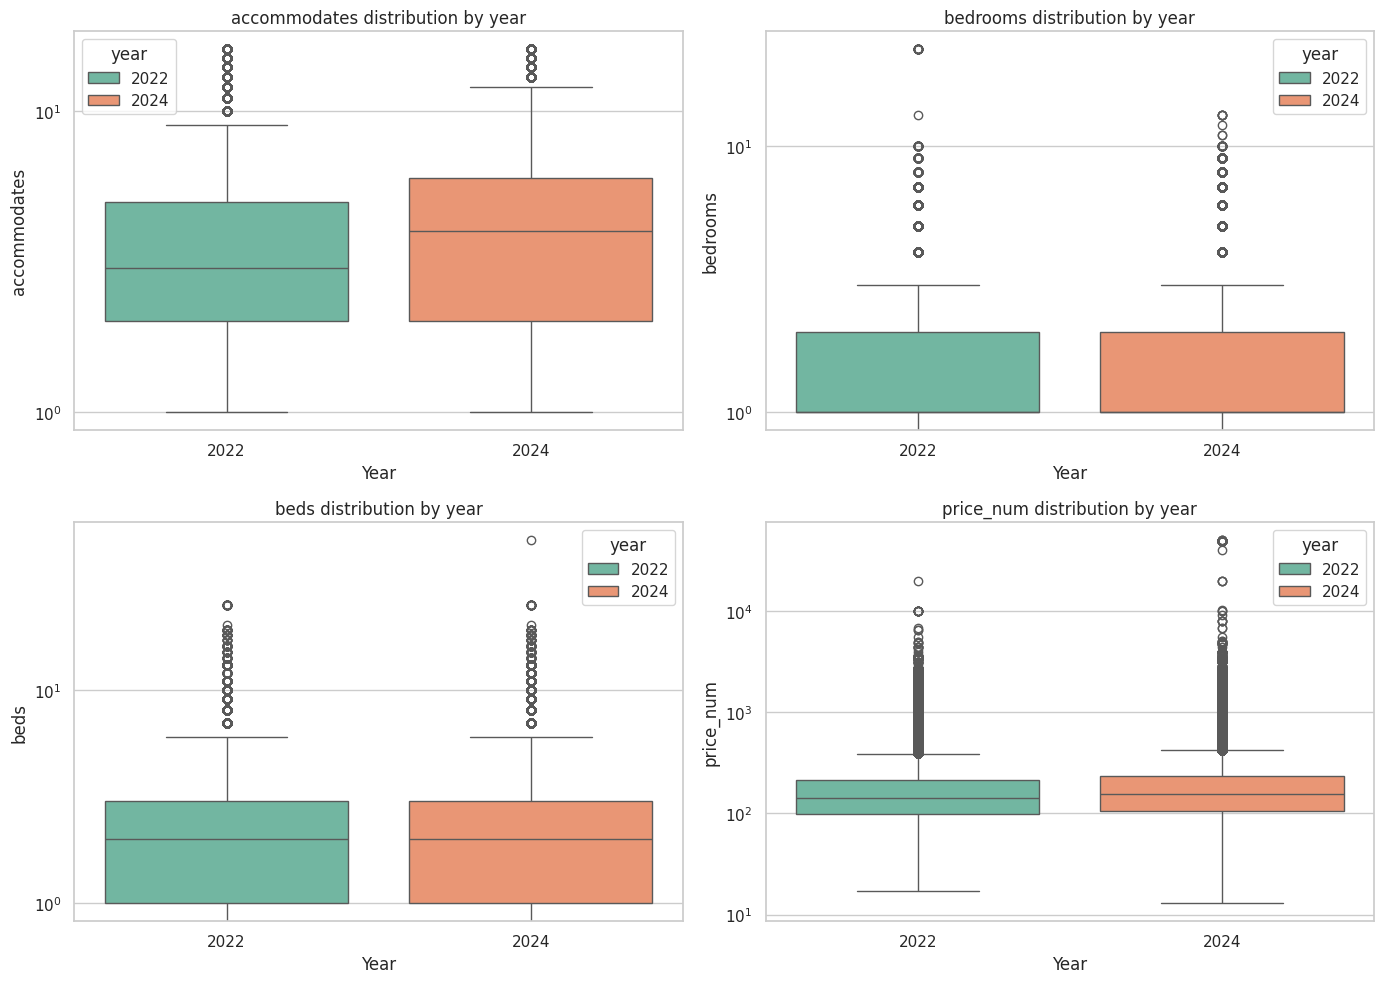

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(
        data=df_combined,
        x='year',
        y=feature,
        hue='year',      # explicitly specify hue
        dodge=False,     # avoid separate boxes for each hue
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'{feature} distribution by year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(feature)
    axes[i].set_yscale('log')  # optional for outliers

plt.tight_layout()
plt.show()

# Saving the final dataframe

Define the columns to save

In [51]:
final_columns = [
    'listing_id', 'id_review', 'date', 'reviewer_id', 'reviewer_name', 'comments',
    'language', 'year', 'season', 'reviewer_total_reviews', 'name', 'property_type', 
    'room_type', 'neighbourhood_cleansed', 'latitude', 'longitude', 'host_id', 
    'host_total_listings_count', 'host_name', 'number_of_reviews', 'review_scores_rating',
    'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
    'review_scores_communication','review_scores_location','review_scores_value',
    'accommodates','bedrooms','beds','price_num','amenities_count','business_status', 'establishment_type'
]

Ensure missing columns exist

In [52]:
for col in final_columns:
    if col not in la_reviews_2022.columns:
        la_reviews_2022[col] = np.nan
    if col not in la_reviews_2024.columns:
        la_reviews_2024[col] = np.nan

Select columns

In [53]:
la_reviews_2022_final = la_reviews_2022[final_columns].copy()
la_reviews_2024_final = la_reviews_2024[final_columns].copy()

Save as Parquet

In [54]:
la_reviews_2022_final.to_parquet("../data/processed/la_airbnb_reviews_2022_clean.parquet", index=False)
la_reviews_2024_final.to_parquet("../data/processed/la_airbnb_reviews_2024_clean.parquet", index=False)

Save as CSV

In [55]:
la_reviews_2022_final.to_csv("../data/processed/la_airbnb_reviews_2022_clean.csv", index=False)
la_reviews_2024_final.to_csv("../data/processed/la_airbnb_reviews_2024_clean.csv", index=False)